# 文字与注释

一个优秀的可视化作品就是给读者讲一个精彩的故事。虽然在一些场景中，这个故事可以完全通过视觉来表达，不需要任何多余的文字。但在另外一些场景中，辅之以少量的文字提示（`textual cue`）和标签是必不可少的。  
虽然最基本的注释（`annotation`）类型可能只是坐标轴标题与图标题，但注释可远远不止这些。  
让我们可视化一些数据，看看如何通过添加注释来更恰当地表达信息。

In [3]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

## 1. 案例：节假日对美国出生率的影响

In [4]:
births = pd.read_csv('../data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
# The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
# births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.index = [datetime.datetime(2012, month, day) for (month, day) in births_by_date.index]

<AxesSubplot:>

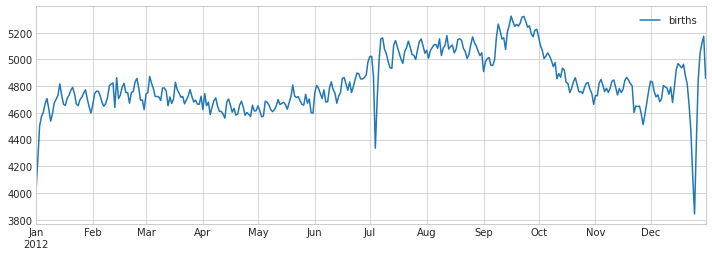

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)  # 日均出生人数统计图

在用这样的图表达观点时，如果可以在图中增加一些注释，就更能吸引读者的注意了。  
可以通过 `plt.text/ax.text` 命令手动添加注释，它们可以在具体的 `x / y` 坐标点上放上文字。

`ax.text` 方法需要一个 `x` 轴坐标、一个 `y` 轴坐标、一个字符串和一些可选参数，比如文字的颜色、字号、风格、对齐方式以及其他文字属性。  
这里用了 `ha='right'` 与 `ha='center'`，`ha` 是**水平对齐方式**（`horizonal alignment`）的缩写。

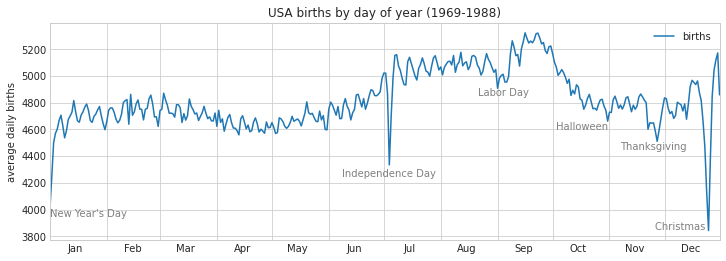

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在图上增加文字标签
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 设置坐标轴标题
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# 设置x轴刻度值，让月份居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

## 2. 坐标变换与文字位置

## 3. 箭头与注释